In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r"C:\Users\User\Downloads\tree_animals.xlsx")
# with pd.option_context('display.max_rows', 10): display(df)
# Columns' names below: 'Name', 'Blood_Temperature', 'Give_Birth', 'Can_Fly', 'Live_In_Water',
# 'Have_Legs', 'Species'
df.drop(columns=['Name'], inplace=True)

In [3]:
encoders = []
for i in range(0, len(df.columns) - 1):
    enc = LabelEncoder()
    df.iloc[:, i] = enc.fit_transform(df.iloc[:, i])
    encoders.append(enc)
    
with pd.option_context('display.max_rows', 6): display(df)
x = df.iloc[:, 0:5]
y = df['Species']
model = DecisionTreeClassifier(criterion='entropy') # using ‘entropy’ for ID3, using 'gini’ for CART method
model.fit(x, y)

,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species
0,1,1,0,0,1,Mammals
1,0,0,0,0,0,Reptiles
2,1,1,1,0,1,Mammals
...,...,...,...,...,...,...
17,1,1,0,2,0,Mammals
18,0,0,0,2,0,Fishes
19,1,0,1,0,1,Birds


DecisionTreeClassifier(criterion='entropy')

In [6]:
# x_pred = ['Warm', 'No', 'Yes', 'Sometimes', 'No'] # Blood_Tem, Give_Birth, Can_Fly, Live_In_Water, Have_Legs
x_pred = ['Cold', 'No', 'No', 'Yes', 'No'] # Blood_Tem, Give_Birth, Can_Fly, Live_In_Water, Have_Legs

for i in range(0, len(df.columns) - 1):
    x_pred[i] = encoders[i].transform([x_pred[i]])
    
x_pred_a = np.array(x_pred).reshape(-1, 5) # or len(df.columns)-1
y_pred = model.predict(x_pred_a)
print('Prediction:', y_pred[0])
score = model.score(x, y)
print('Accuracy:', '{:.2f}'.format(score))

Prediction: Fishes
Accuracy: 0.95


c:\Users\User\Desktop\test\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


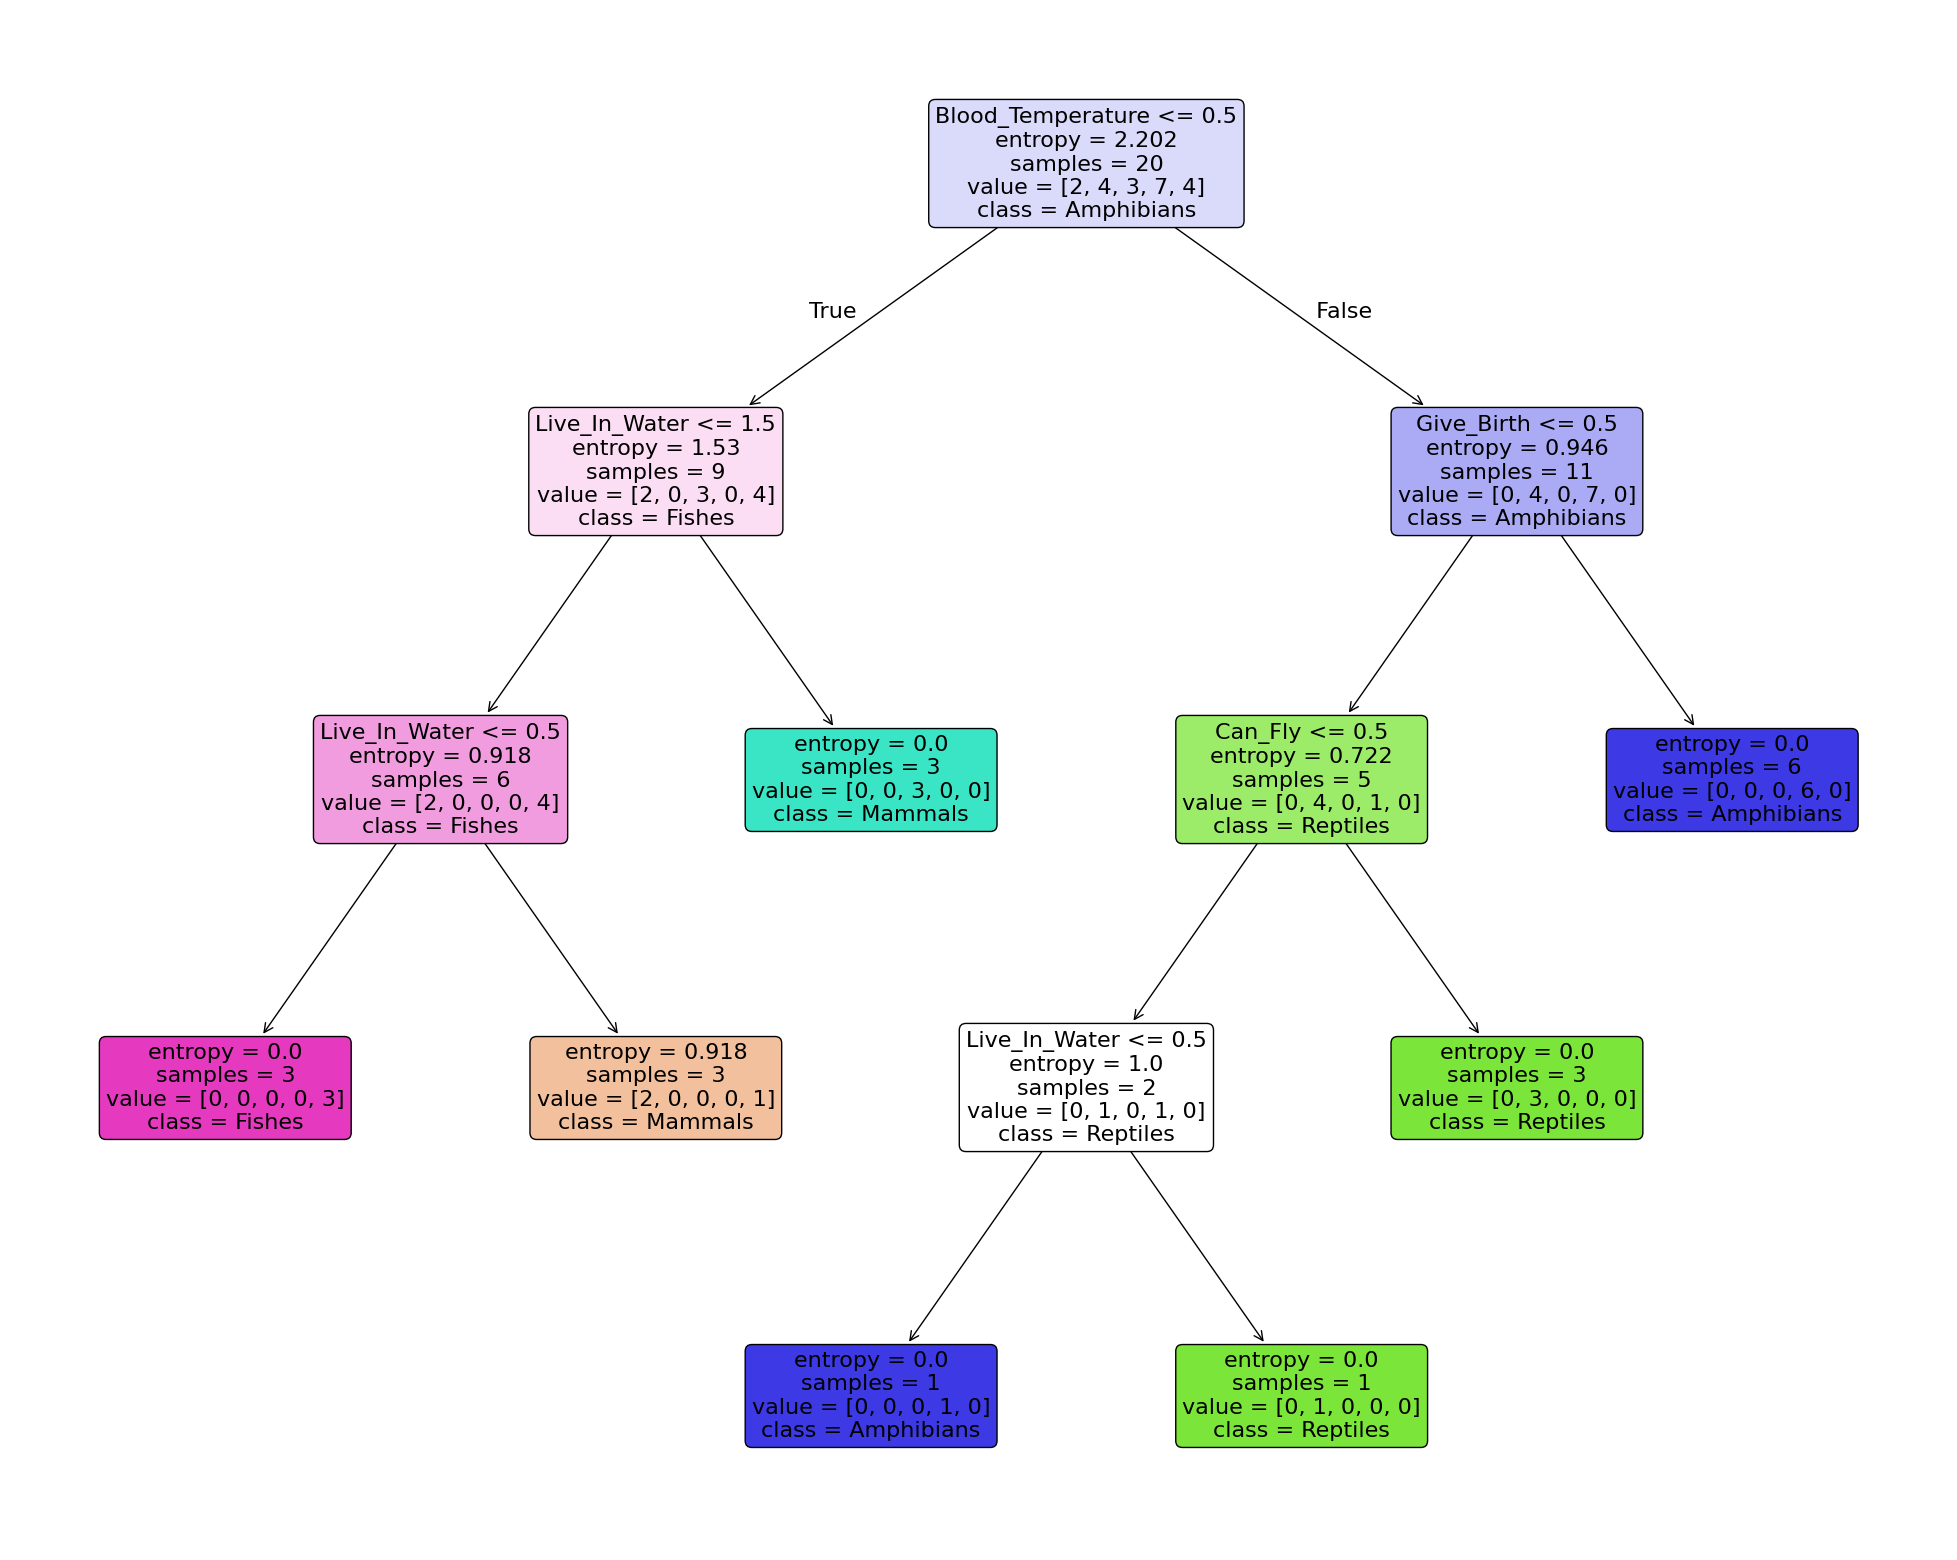

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 20))
t = plot_tree(model,
feature_names=x.columns,
class_names=y,
label='all',
impurity=True,
precision=3,
filled=True,
rounded=True,
fontsize=16)
plt.show()